# **Task_31**

In [106]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [107]:
df=pd.read_csv('/content/drive/MyDrive/ByteWise Tasks/file.csv')

In [108]:
# Selecting numerical features
features = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]


In [109]:
# Encoding the Weather labels
le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])

In [110]:
# Splitting the dataset into training and testing sets
X = df[features]
y = df['Weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Standardizing the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**PCA**

In [113]:
# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 85% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

**LDA**

In [114]:
# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

**t-SNE**

In [115]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_std)

**ICA**

In [116]:
# Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_train_ica = ica.fit_transform(X_train_std)

**Results**

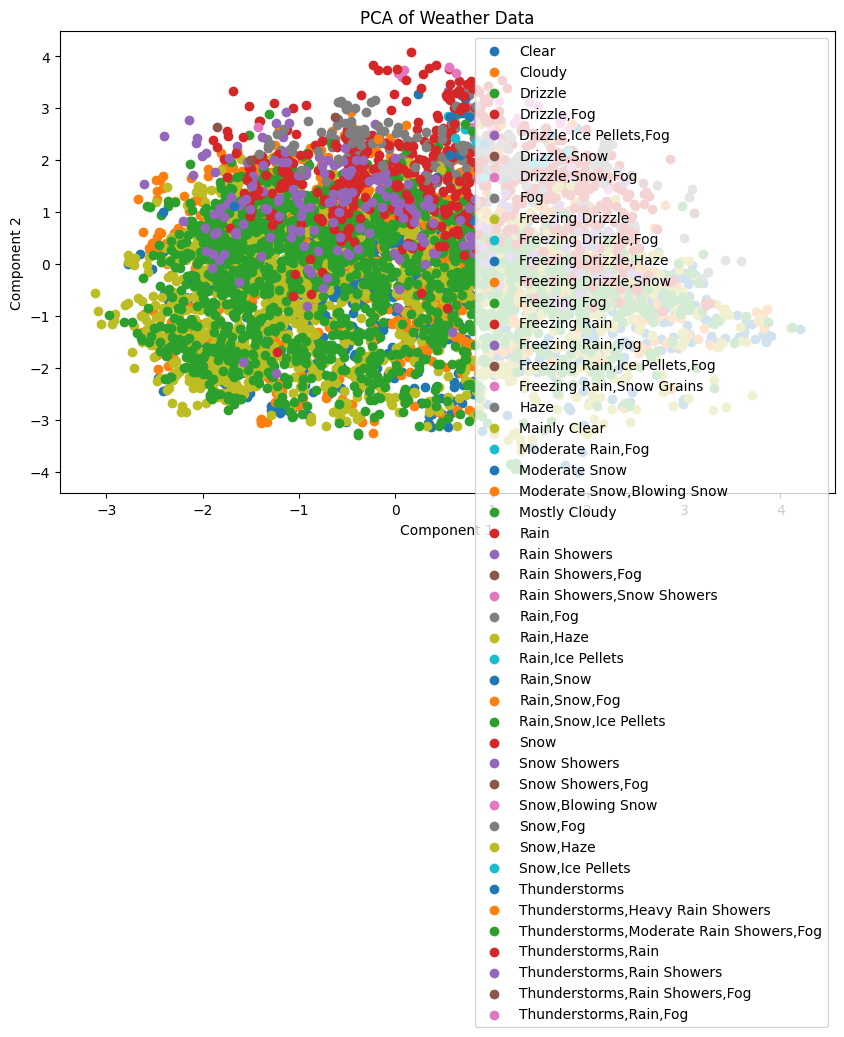

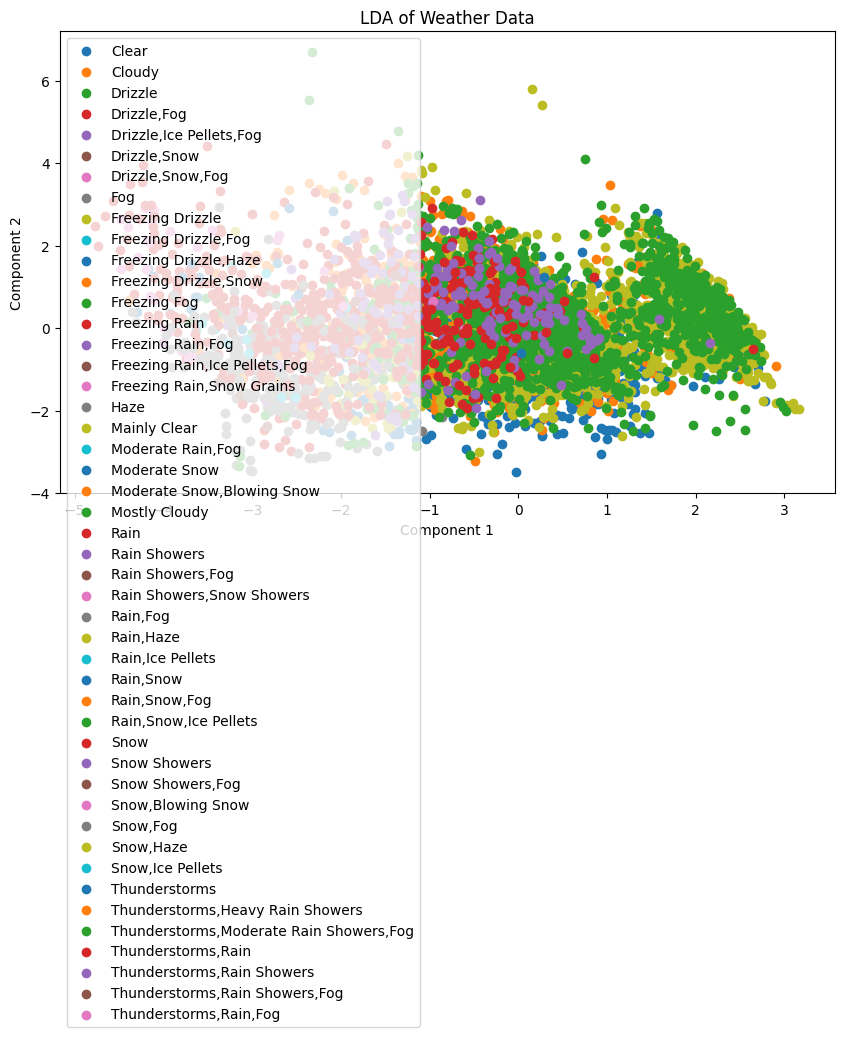

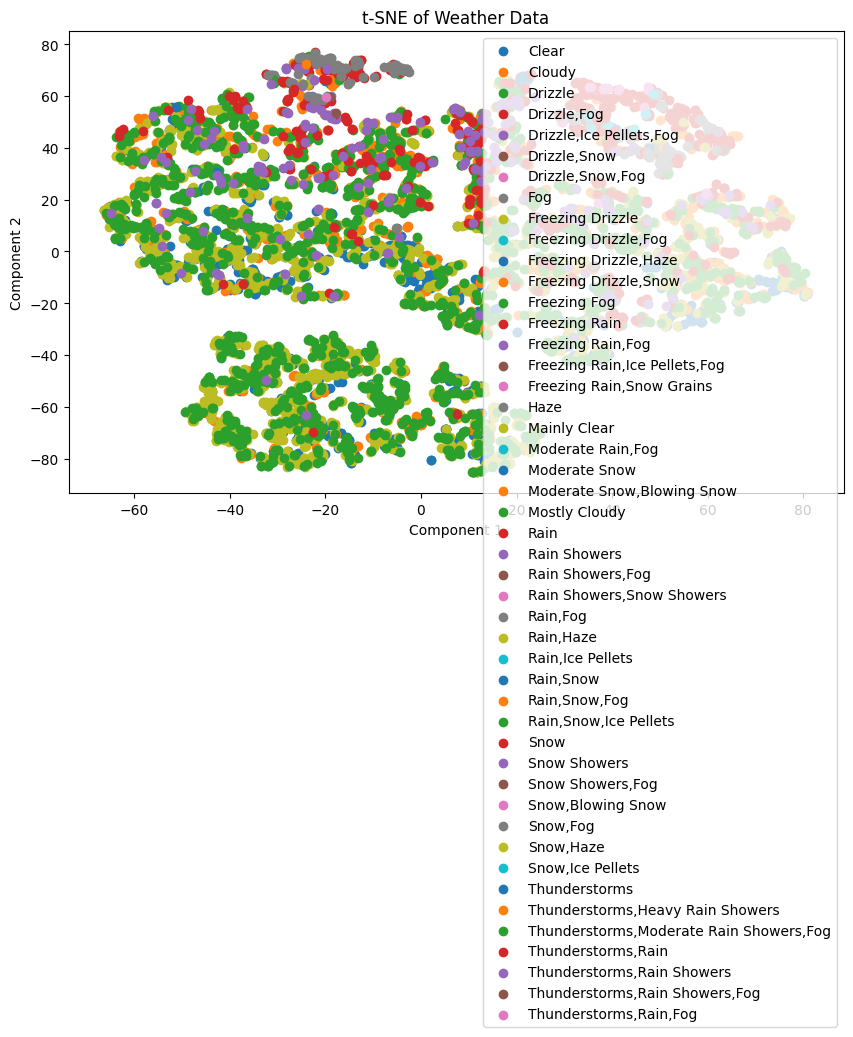

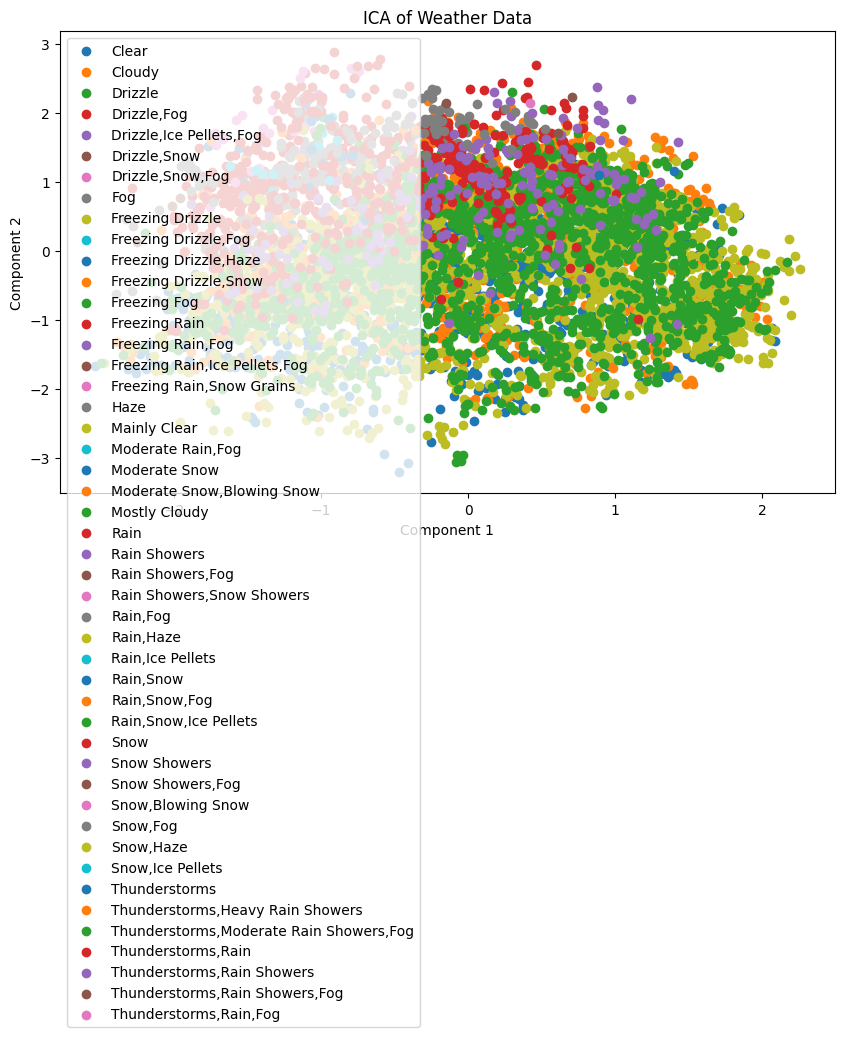

Original Training Data Shape: (7027, 6)
Reduced Training Data Shape (PCA): (7027, 3)
Number of Components Selected: 3


In [117]:
def plot_results(X, y, title):
    plt.figure(figsize=(10, 6))
    for label in np.unique(y):
        indices = y == label
        plt.scatter(X[indices, 0], X[indices, 1], label=le.inverse_transform([label])[0])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting the results
plot_results(X_train_pca, y_train, 'PCA of Weather Data')
plot_results(X_train_lda, y_train, 'LDA of Weather Data')
plot_results(X_train_tsne, y_train, 't-SNE of Weather Data')
plot_results(X_train_ica, y_train, 'ICA of Weather Data')

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)